In [4]:
## importing necessary libraries of tensorfllow
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#mounting the drive on google colab for unzipping the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#unzipping the PlantVillage file contains images of disease and healthy potato leaves
import zipfile
import os

zip_train = zipfile.ZipFile('/content/drive/MyDrive/PlantVillage.zip', 'r')

zip_train.extractall('/home')  # extracting in home file 
zip_train.close()

In [7]:
import splitfolders # or import splitfolders
input_folder = "/home/PlantVillage"
output_folder='/tmp'

#spiliting the image folder for validation and training folder
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2)) # taking validation ratio as 0.2

Copying files: 2152 files [00:00, 4977.73 files/s]


In [8]:
## ImageDataGenearator is used for Data Augmentation
## Applyimg data Augmentation for incresing the traning size of image folder and also prevent overfitting 

#defining hyperparamter need for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )

## only rescaling the validation images
val_datagen=ImageDataGenerator(
    rescale=1./255
)

##appling the augmentaion on training folder
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',# defining the path
    target_size=(180,180),
    batch_size=32,
    class_mode='sparse',# three classes
    )

## applying the augmentation on val folder
validation_generator = val_datagen.flow_from_directory(
    '/tmp/val',# the path
    target_size=(180,180),
    batch_size=32,
    class_mode='sparse',
    )


Found 1721 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


In [9]:
##importing libraries for hyperparamter and fine the tuning the models

from tensorflow.keras.layers import Flatten

import keras
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import layers

In [9]:
## importing the resnet 50 model as transfer learning model 
## ResNet50 is a deep convolutional neural network (CNN) architecture that was developed by Microsoft and is powerful image classification model 
from tensorflow.keras.applications import ResNet50


##adding the dense layers  
model=Sequential()

## making all layers untrainable for first time
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in resnet_50.layers:
    layer.trainable = False

model.add(resnet_50)
model.add(Flatten())# flattening 
model.add(Dense(128,activation='relu'))## adding the dense layers and takin relu as an activation for first two layers
model.add(layers.Dropout(0.3)) # defining the dropout 
model.add(Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(3,activation='softmax'))## as there are three classes so 3 neurons for last layer and also sigmoid for multi class 

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
##compiling the model with Adam optimizer and defining the loss and metrics 
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
## fitting the model with training and validation image data 
history=model.fit(
    train_generator,
    epochs=20,#number of epochs
    validation_data=validation_generator
)

Epoch 1/20
54/54 [==============================] - 35s 481ms/step - loss: 1.1000 - accuracy: 0.4747 - val_loss: 0.7967 - val_accuracy: 0.7610
Epoch 2/20
54/54 [==============================] - 18s 324ms/step - loss: 0.9050 - accuracy: 0.5689 - val_loss: 0.8360 - val_accuracy: 0.5545
Epoch 3/20
54/54 [==============================] - 17s 320ms/step - loss: 0.8834 - accuracy: 0.5962 - val_loss: 0.6976 - val_accuracy: 0.7796
Epoch 4/20
54/54 [==============================] - 17s 324ms/step - loss: 0.8290 - accuracy: 0.6467 - val_loss: 0.7590 - val_accuracy: 0.6636
Epoch 5/20
54/54 [==============================] - 17s 316ms/step - loss: 0.7939 - accuracy: 0.6572 - val_loss: 0.6609 - val_accuracy: 0.7819
Epoch 6/20
54/54 [==============================] - 20s 362ms/step - loss: 0.7818 - accuracy: 0.6781 - val_loss: 0.7246 - val_accuracy: 0.7193
Epoch 7/20
54/54 [==============================] - 21s 388ms/step - loss: 0.7421 - accuracy: 0.7031 - val_loss: 0.7836 - val_accuracy: 0.6613

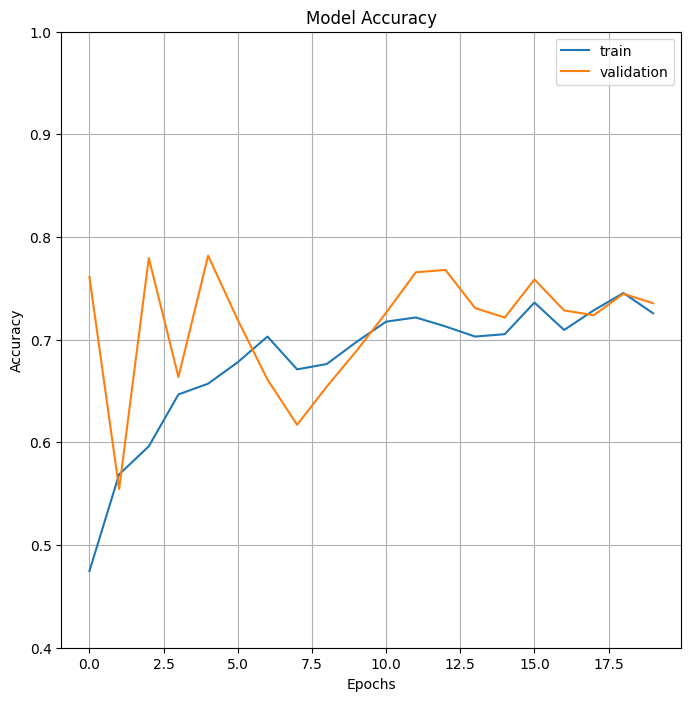

In [12]:
##plotting the graph for accuracy of validation and training accuarcy
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

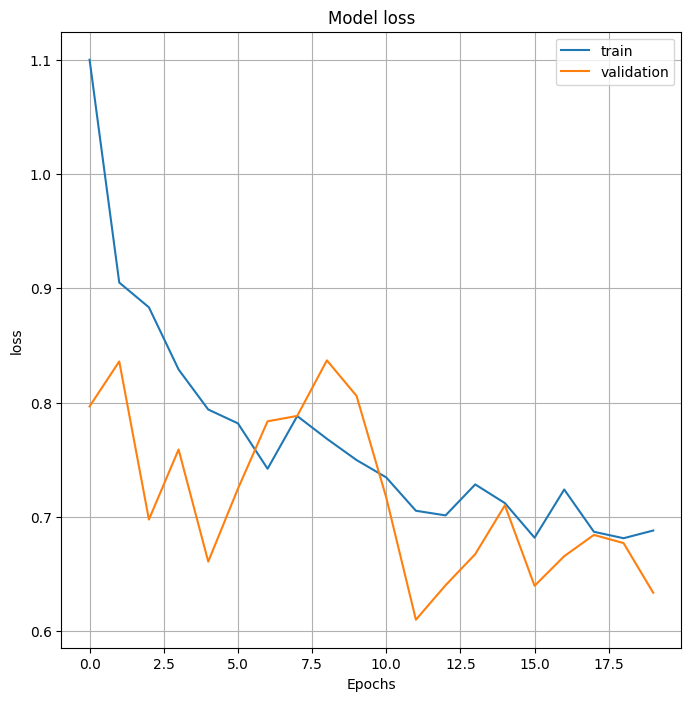

In [16]:
##plotting the graph for loss in traning and validation
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history.history['loss'], label="Training loss")

plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")

plt.grid()

plt.title('Model loss')

plt.ylabel('loss')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [13]:
from tensorflow.keras.applications import ResNet50

model_1=Sequential()

resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in resnet_50.layers:
    layer.trainable = False
## decreasing the number of dense layers 
model_1.add(resnet_50)
model_1.add(Flatten())
model_1.add(Dense(64,activation='relu'))
model_1.add(layers.Dropout(0.3))
model_1.add(Dense(3,activation='softmax'))


In [14]:
## recompiling the model with changes 

model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
## refittin the model 
history_1=model_1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
54/54 [==============================] - 21s 333ms/step - loss: 0.9671 - accuracy: 0.5578 - val_loss: 0.8788 - val_accuracy: 0.4733
Epoch 2/20
54/54 [==============================] - 17s 317ms/step - loss: 0.8447 - accuracy: 0.6165 - val_loss: 0.7416 - val_accuracy: 0.7053
Epoch 3/20
54/54 [==============================] - 17s 314ms/step - loss: 0.7822 - accuracy: 0.6601 - val_loss: 0.6648 - val_accuracy: 0.7703
Epoch 4/20
54/54 [==============================] - 24s 435ms/step - loss: 0.7535 - accuracy: 0.6601 - val_loss: 0.7492 - val_accuracy: 0.7077
Epoch 5/20
54/54 [==============================] - 25s 469ms/step - loss: 0.7420 - accuracy: 0.6641 - val_loss: 0.7053 - val_accuracy: 0.7285
Epoch 6/20
54/54 [==============================] - 17s 318ms/step - loss: 0.7343 - accuracy: 0.6612 - val_loss: 0.6758 - val_accuracy: 0.7378
Epoch 7/20
54/54 [==============================] - 17s 312ms/step - loss: 0.7189 - accuracy: 0.6653 - val_loss: 0.6958 - val_accuracy: 0.7285

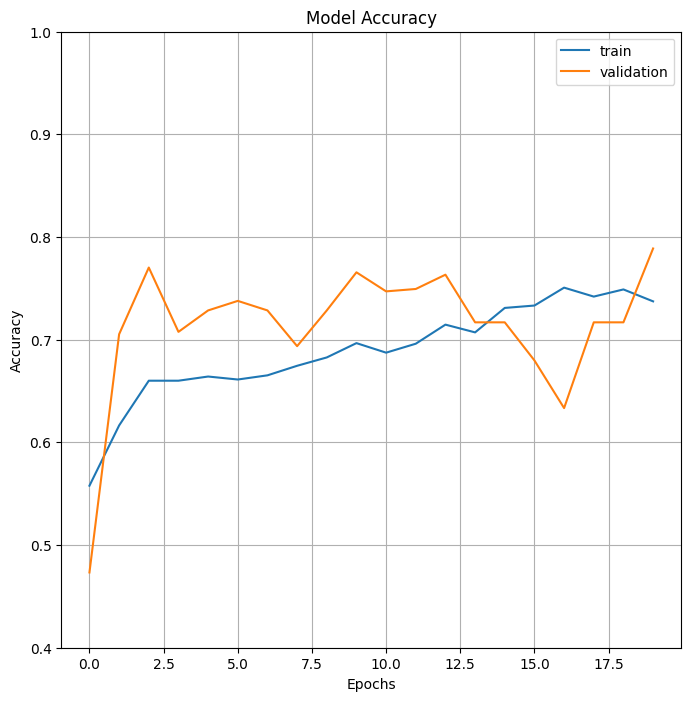

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history_1.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history_1.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

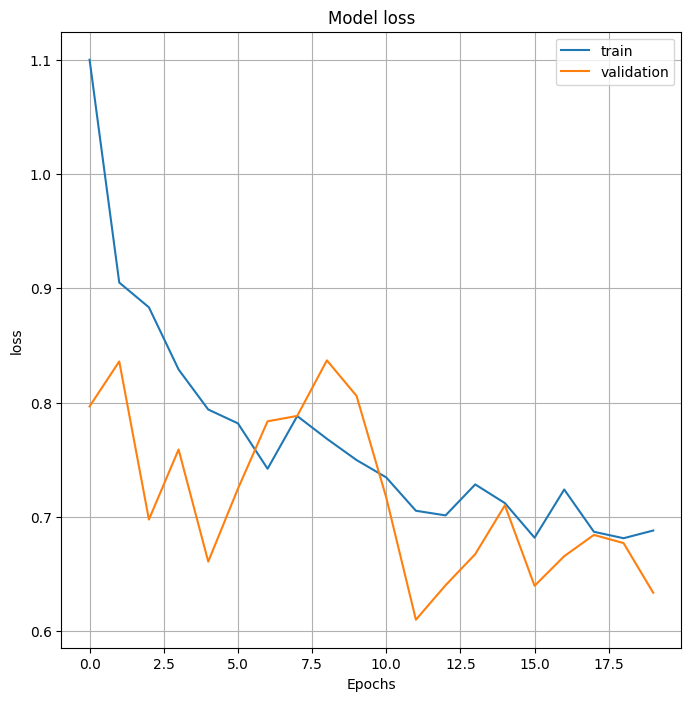

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history.history['loss'], label="Training loss")

plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")

plt.grid()

plt.title('Model loss')

plt.ylabel('loss')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [19]:
from tensorflow.keras.applications import ResNet50

model_1=Sequential()

resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [20]:
## all layers of resnset 50
for i, layer in enumerate(resnet_50.layers):
   print(i, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
for layer in resnet_50.layers[:165]:
   layer.trainable = False
for layer in resnet_50.layers[165:]:
   layer.trainable = True

for i, layer in enumerate(resnet_50.layers):
   print(i, layer.name, layer.trainable)

In [22]:
from tensorflow.keras.applications import ResNet50

model_2=Sequential()
## fine tuning the last layers of resent 50 
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in resnet_50.layers[:165]:
   layer.trainable = False
for layer in resnet_50.layers[165:]:
   layer.trainable = True
model_2.add(resnet_50)
model_2.add(Flatten())
model_2.add(Dense(64,activation='relu'))
model_2.add(layers.Dropout(0.3))
model_2.add(Dense(3,activation='softmax'))


In [23]:
# again compiling the model
model_2.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [24]:
## fitting the model
history_2=model_2.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
54/54 [==============================] - 24s 366ms/step - loss: 0.9929 - accuracy: 0.6746 - val_loss: 1.0320 - val_accuracy: 0.4640
Epoch 2/20
54/54 [==============================] - 17s 320ms/step - loss: 0.7068 - accuracy: 0.7223 - val_loss: 0.8181 - val_accuracy: 0.4988
Epoch 3/20
54/54 [==============================] - 23s 421ms/step - loss: 0.6598 - accuracy: 0.7478 - val_loss: 0.8140 - val_accuracy: 0.5313
Epoch 4/20
54/54 [==============================] - 17s 318ms/step - loss: 0.6503 - accuracy: 0.7571 - val_loss: 0.7402 - val_accuracy: 0.6195
Epoch 5/20
54/54 [==============================] - 18s 330ms/step - loss: 0.6062 - accuracy: 0.7838 - val_loss: 0.5568 - val_accuracy: 0.7981
Epoch 6/20
54/54 [==============================] - 17s 318ms/step - loss: 0.5917 - accuracy: 0.7827 - val_loss: 0.4503 - val_accuracy: 0.8190
Epoch 7/20
54/54 [==============================] - 17s 321ms/step - loss: 0.6221 - accuracy: 0.7542 - val_loss: 0.4723 - val_accuracy: 0.8167

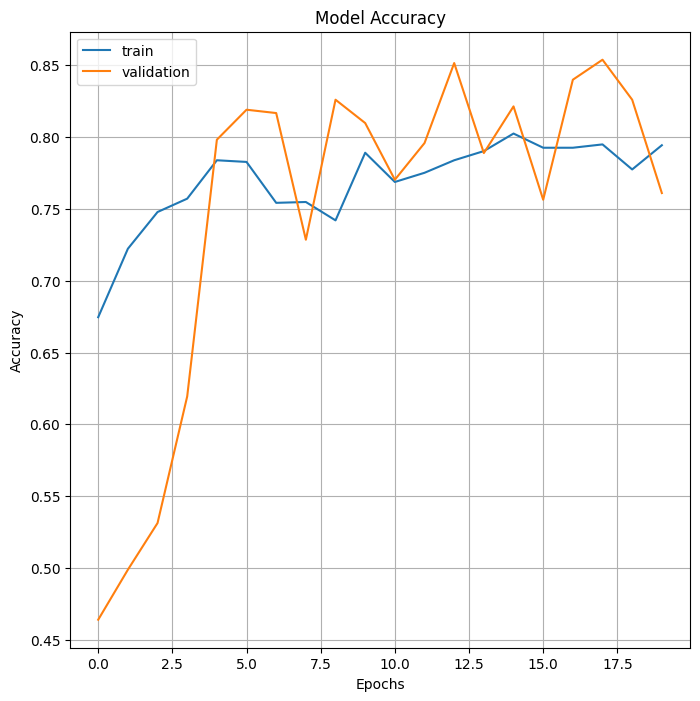

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history_2.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history_2.history['val_accuracy'], label="Validation Accuracy")

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

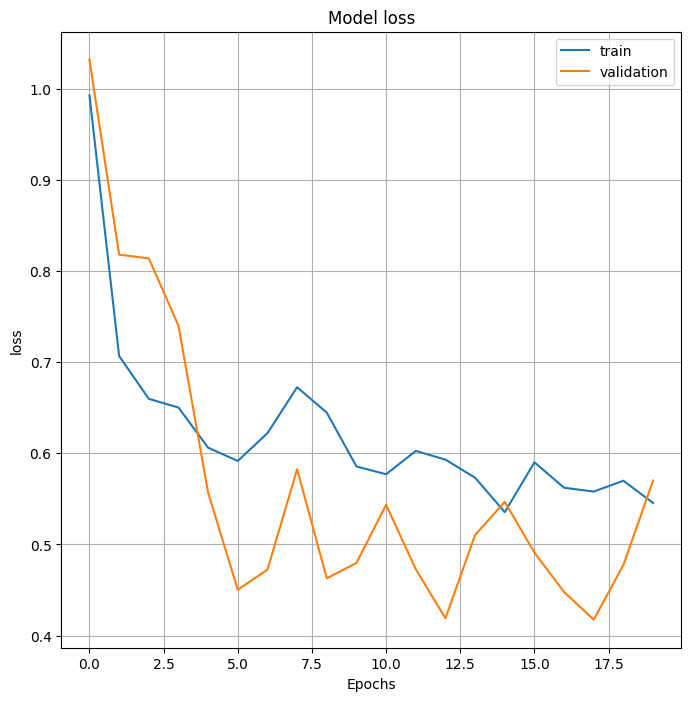

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(20)

plt.plot( epochs_range, history_2.history['loss'], label="Training loss")

plt.plot(epochs_range, history_2.history['val_loss'], label="Validation Loss")

plt.grid()

plt.title('Model loss')

plt.ylabel('loss')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [27]:
## VGG 16 is another powerful image classification modle developed by googel and is 16 layers deep 

#importing the VGG 16 model
from keras.applications.vgg16 import VGG16


vgg_16 = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(180,180,3)
)
vgg_16.trainable = True

set_trainable = False
## making last layers of model to be trainable 
for layer in vgg_16.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in vgg_16.layers:
  print(layer.name,layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [28]:
from keras.applications.vgg16 import VGG16

model_vgg=Sequential()
vgg_16 = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(180,180,3)
)

vgg_16.trainable = True

set_trainable = False
##fine tuning the model 
for layer in vgg_16.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

## adding the VGG 16 model
model_vgg.add(vgg_16)
model_vgg.add(Flatten())
model_vgg.add(Dense(64,activation='relu'))
model_vgg.add(layers.Dropout(0.3))
model_vgg.add(Dense(3,activation='softmax'))

In [29]:
## compiling the model with same hyperparamters 
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
## fitting the model 
history_vgg=model_vgg.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

Epoch 1/25
54/54 [==============================] - 33s 466ms/step - loss: 0.5396 - accuracy: 0.7740 - val_loss: 0.2744 - val_accuracy: 0.8817
Epoch 2/25
54/54 [==============================] - 17s 320ms/step - loss: 0.2881 - accuracy: 0.8879 - val_loss: 0.1233 - val_accuracy: 0.9675
Epoch 3/25
54/54 [==============================] - 18s 323ms/step - loss: 0.2234 - accuracy: 0.9204 - val_loss: 0.1234 - val_accuracy: 0.9374
Epoch 4/25
54/54 [==============================] - 18s 326ms/step - loss: 0.1317 - accuracy: 0.9587 - val_loss: 0.1765 - val_accuracy: 0.9513
Epoch 5/25
54/54 [==============================] - 18s 341ms/step - loss: 0.1207 - accuracy: 0.9617 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 6/25
54/54 [==============================] - 18s 325ms/step - loss: 0.1216 - accuracy: 0.9582 - val_loss: 0.1401 - val_accuracy: 0.9536
Epoch 7/25
54/54 [==============================] - 17s 322ms/step - loss: 0.1220 - accuracy: 0.9640 - val_loss: 0.0928 - val_accuracy: 0.9698

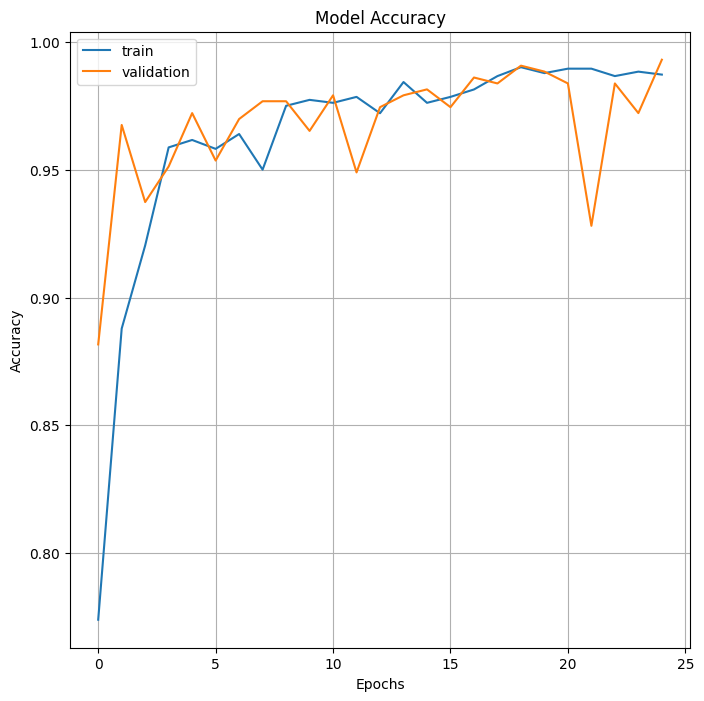

In [32]:
#plotting the graphs of accuarcy
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

epochs_range= range(25)

plt.plot( epochs_range, history_vgg.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history_vgg.history['val_accuracy'], label="Validation Accuracy")

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

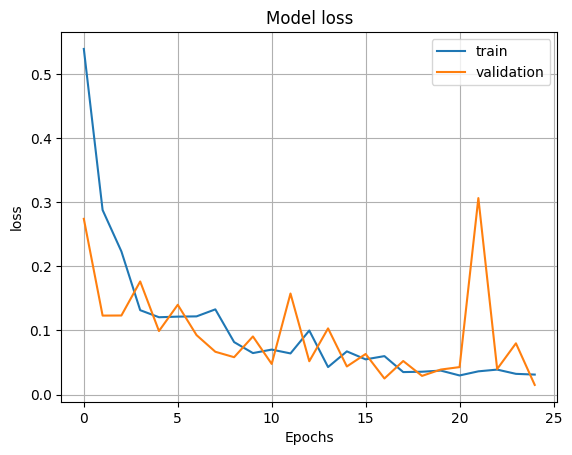

In [33]:
##plotting the graph for loss in traning and validation
epochs_range= range(25)

plt.plot( epochs_range, history_vgg.history['loss'], label="Training loss")

plt.plot(epochs_range, history_vgg.history['val_loss'], label="Validation Loss")

plt.grid()

plt.title('Model loss')

plt.ylabel('loss')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [34]:
## saving this high performance model 
from tensorflow.keras.models import load_model
model_vgg.save('DiseaseDetectionvgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model
# loading the model 
model_3=load_model('/content/DiseaseDetectionvgg16.h5')


In [13]:
## this is end to end function from giving the image path to classify the potato leaf whether it is healthy or having any kind of disease

import cv2
import numpy as np

def predict_potato_disease(image_path, model, class_labels):

  # Read the image
  image = cv2.imread(image_path)

  # Check if image reading was successful
  if image is None:
      print("Error: Could not read image from", image_path)
      return None

  # Preprocess the image
  target_size = (180, 180)  # Adjust based on your model's training size
  resized_image = cv2.resize(image, target_size)
  normalized_image = resized_image.astype('float32') / 255.0

  # Add a batch dimension (if the model expects batches)
  image_batch = np.expand_dims(normalized_image, axis=0)

  # Make prediction
  predictions = model.predict(image_batch)

  # Identify the most likely class
  predicted_class = np.argmax(predictions)

  # Map the class index to disease name
  predicted_disease = class_labels[predicted_class]

  return predicted_disease

# Example usage (assuming model and class_labels are defined)
class_names = list(train_generator.class_indices.keys())
image_path = "/tmp/val/Potato___Late_blight/051089cf-e083-4fdb-9256-aac12b8a55d2___RS_LB 4078.JPG"
predicted_disease = predict_potato_disease(image_path, model_3, class_names)

if predicted_disease:
  print("Predicted Disease:", predicted_disease)
else:
  print("Error: Could not predict disease")

1/1 [==============================] - 2s 2s/step
Predicted Disease: Potato___Late_blight
